In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('./archive/Clean_Dataset.csv', index_col = 0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


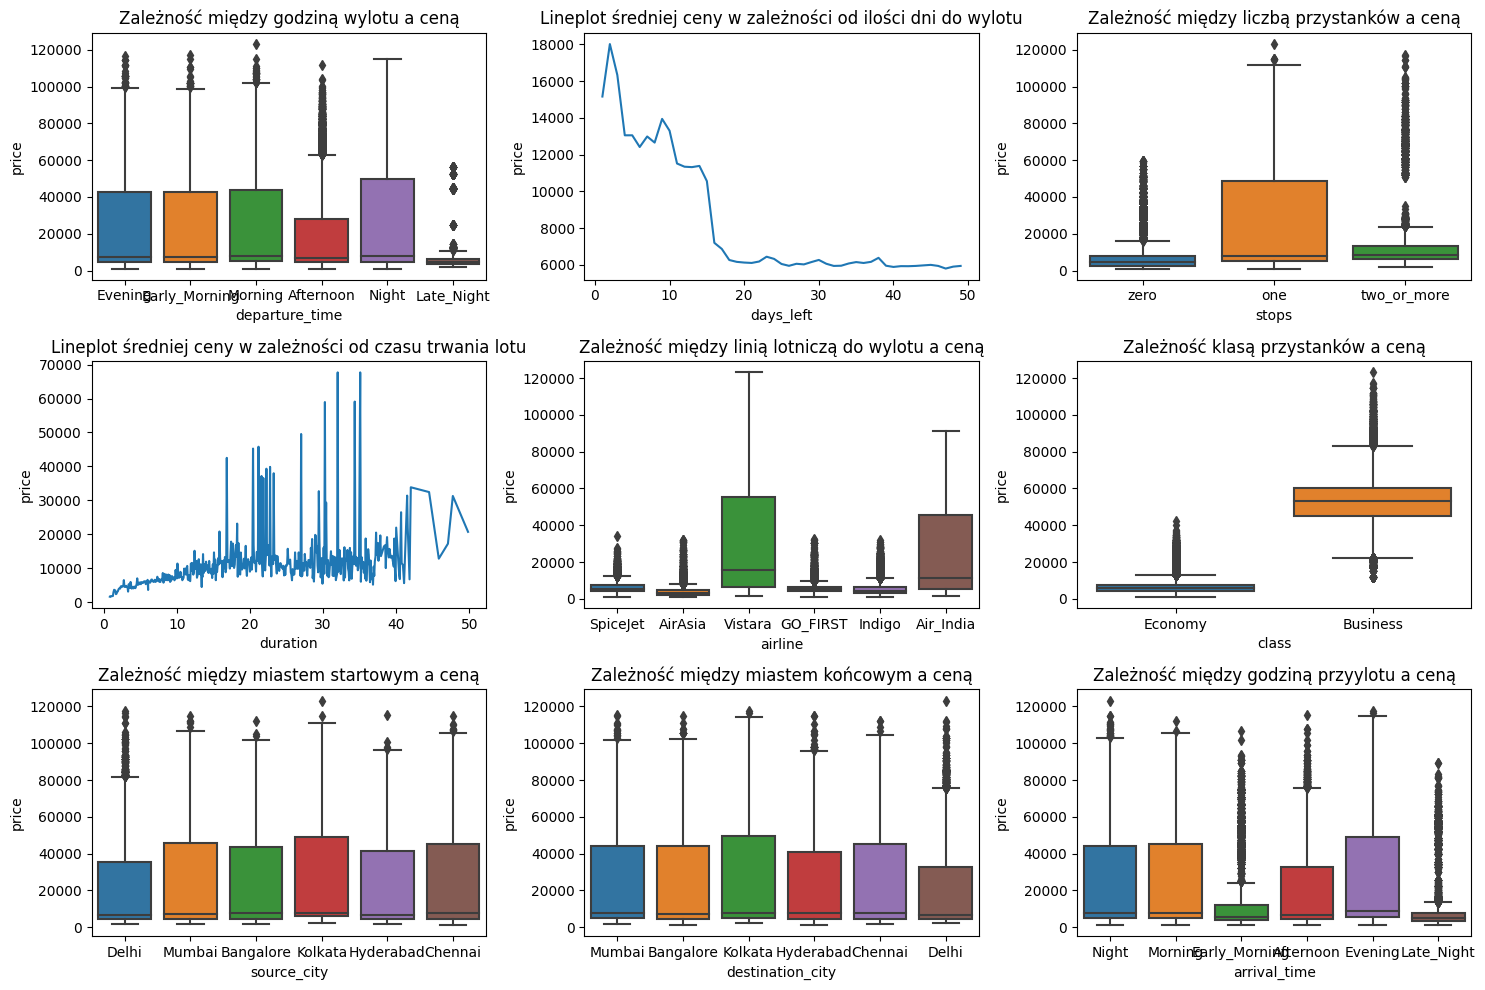

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10)) 

# Scatter plot for 'departure_time' vs 'price'
sns.boxplot(x='departure_time', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Zależność między godziną wylotu a ceną')

# Scatter plot for another variable vs 'price'
sns.lineplot(x='duration', y='price', data=df.groupby('duration')['price'].median().reset_index(), ax=axes[1, 0])
axes[1, 0].set_title('Lineplot średniej ceny w zależności od czasu trwania lotu')

# Scatter plot for another variable vs 'price'
sns.lineplot(x='days_left', y='price', data=df.groupby('days_left')['price'].median().reset_index(), ax=axes[0, 1])
axes[0, 1].set_title('Lineplot średniej ceny w zależności od ilości dni do wylotu')

sns.boxplot(x='airline', y='price', data=df, ax=axes[1,1])
axes[1, 1].set_title('Zależność między linią lotniczą do wylotu a ceną')

sns.boxplot(x='source_city', y='price', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Zależność między miastem startowym a ceną')

sns.boxplot(x='destination_city', y='price', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Zależność między miastem końcowym a ceną')

sns.boxplot(x = 'stops', y = 'price', data = df, ax = axes[0, 2])
axes[0, 2].set_title('Zależność między liczbą przystanków a ceną')

sns.boxplot(x = 'class', y = 'price', data = df, ax = axes[1, 2])
axes[1, 2].set_title('Zależność klasą przystanków a ceną')

sns.boxplot(x='arrival_time', y='price', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Zależność między godziną przyylotu a ceną')



plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


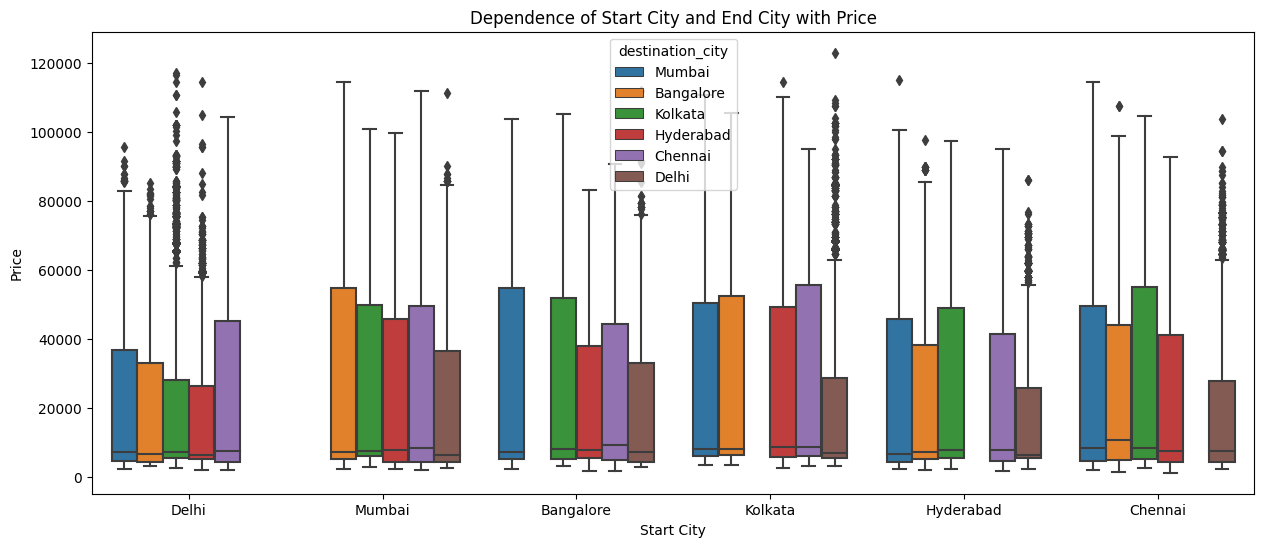

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='source_city', y='price', hue='destination_city', data=df)
plt.title('Dependence of Start City and End City with Price')
plt.xlabel('Start City')
plt.ylabel('Price')
plt.show()

In [17]:
df['airline'].astype('category')
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

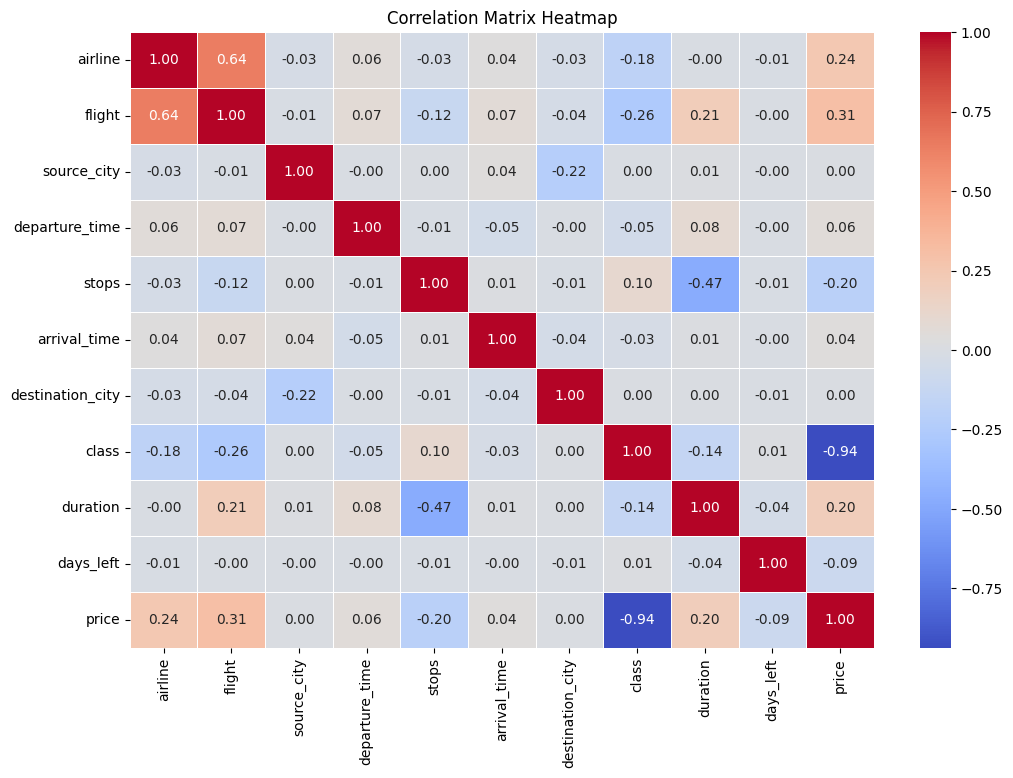

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
object_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Looks like there is strong correlation between **Price** and **Class**. Other features don't affect price that much.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE with default parameters: {round(mse/1e6, 3)} mln')
print(f'MAE with default parameters: {round(mae/1e3, 3)} k')
print(f'r2 with default parameters: {r2}')


MSE with default parameters: 8.83 mln
MAE with default parameters: 0.892 k
r2 with default parameters: 0.9828705946412882


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None,5, 7, 10, 13, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 12, 15, 17, 20, 25, 30]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': 30, 'min_samples_split': 25}

In [25]:
model2 = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_split = best_params['min_samples_split'])
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE with default parameters (Decission Tree): {round(mse/1e6, 3)} mln')
print(f'MAE with default parameters (Decission Tree): {round(mae/1e3, 3)} k')
print(f'r2 with default parameters (Decission Tree): {round(r2, 2)}')

MSE with default parameters (Decission Tree): 6.936 mln
MAE with default parameters (Decission Tree): 1.033 k
r2 with default parameters (Decission Tree): 0.9865445224776684


In [27]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 250, 500]
}

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE with default parameters (XGBoost): {round(mse/1e6, 3)} mln')
print(f'MAE with default parameters (XGBoost): {round(mae/1e3, 3)} k')
print(f'r2 with default parameters (XGBoost): {round(r2, 2)}')

MSE with default parameters (XGBoost): 5.841 mln
MAE with default parameters (XGBoost): 1.283 k
r2 with default parameters (XGBoost): 0.99


In [28]:
# Print the best parameters and corresponding RMSE
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}
Best RMSE: -0.9885784245323588
